In [1]:
#!git clone https://github.com/qwerty29544/superresolution_nn.git

Cloning into 'superresolution_nn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 68 (delta 24), reused 47 (delta 7), pack-reused 0
Unpacking objects: 100% (68/68), 11.74 MiB | 6.37 MiB/s, done.


In [33]:
#!mv /content/superresolution_nn/ipynb/model_params model_params

# Решение задачи сверхразрешения с применением нейронной сети

### Введение
Одно из главных направлений развития информационно-телекоммуникационных и радиотехнических систем заключается в повышении их информативности. Важным шагом в этом направлении является улучшение точности угловых измерений и эффективной угловой разрешающей способности с использованием новых методов цифровой обработки сигналов.

Радиолокационные системы (РЛС), основанные на цифровых антенных решетках (ЦАР), преобразуют сигналы в цифровую форму и обрабатывают их с помощью специальных алгоритмов. ЦАР способны анализировать и обрабатывать гораздо больше информации, содержащейся в структуре принимаемого сигнала, чем обычные антенны. В результате возможно достижение разрешающей способности, превышающей предел, определенный критерием Рэлея - сверхразрешение.

Угловое разрешение, основанное на критерии Рэлея, может быть выражено следующим образом:

$$
    \delta \theta \approx \lambda\ /\ D, \quad  (1)
$$

где $D$ - линейный размер антенны, $\lambda$ - длина волны, которая соответствует ширине диаграммы направленности (ДН) до половинной мощности.

Из-за важности задачи повышения углового разрешения во многих странах разрабатываются и внедряются методы цифровой обработки сигналов, которые позволяют превысить (1) и достигать сверхразрешения. \[1-6\]


### Постановка задачи
Принятый ЦАР при сканировании сектора обзора сигнал $U(\alpha)$ можеть быть выражен в виде линейного интегрального преобразования:

\begin{equation}
U(\alpha) = \int \limits_{\Omega}^{} F(\alpha - \varphi) I(\varphi) d\varphi,     \quad (2)
\end{equation}
где $\Omega(\alpha)$ - угловая область расположения источника сигнала; $I(\alpha)$ - угловое распределение амплитуды отраженного (или излучаемого сигнала), равное $0$ вне $\Omega$; $F(\alpha)$ - ДН измерительной системы. Достигаемая при проведении прямых измерений в соответствии с (2) угловая разрешающая способность совпадает с классической величиной (1).

Для ЦАР ставится задача на основе интеллектуального анализа принятого сигнала $U(\alpha)$ и известной ДН системы $F(\alpha)$ восстановить изображение источника сигналов $I(\alpha)$ с угловым разрешением, превышающим критерий Рэлея, во много более возможном масштабе.

В математическом аспекте задача сводится к приближенному решению (2), рассматривамому как линейное интегральное уравнение (ЛИУ) Фредгольма первого рода типа свёртки относительно неизвестной функции $I(\alpha)$, с максимально достижимой точностью.

В общем случае попытки увеличить разрешение по сравнению с (1) путём решения ЛИУ (2) приводят к появлению неустойчивых решений, т.к. поставленная задача относится к классу обратных и не удовлетворяет второму и третьему требованию корректности задачи по Адамару \[3, 7-10\]


### Метод решения
Для ЦАР возможен иной подход к задаче, напрямую не сводящийся к решению ЛИУ (2), что повышает устойчивость используемых алгоритмов.

Для упрощения получаемых выражений рассмотрим большую линейную ЦАР с числом элементов $2N + 1$. Амплитуды токов на излучателях полагаем равными, область расположения источника $\Omega$ - одномерной, с размерами меньшими ширины луча ЦАР $\theta_{0.5}$. Значения амплитудных ДН отдельных излучателей ЦАР в пределах $\theta_{0.5}$ считаем не изменяющимися. Тогда, заменив $sin(\alpha) \approx \alpha$, ДН решётки можно представить в виде:

$$
F(\varphi - \alpha) = \sum\limits_{n=-N}^{N} exp(ikdn(\varphi - \alpha)) ,\quad (3)
$$
где $k = 2\pi/\lambda$ - волновое число, $d$ - расстояние между соседними излучателями, $\alpha$ - направление максимума ДН. Для ЦАР сигнал (2) при введённых условиях преобразуется в сумму:

$$
U(\alpha) = \sum_{n=-N}^{N}exp(-ikdn\alpha)\int\limits_{\Omega}^{}exp(ikdn\varphi)I(\varphi)d\varphi=\sum\limits_{n=-N}^{N}C_n exp(-ikdn\alpha),   \quad (4)
$$
$$
C_n = \int\limits_{\Omega}^{} exp(ikdn\varphi)I(\varphi)d\varphi, n = 0, \pm 1, \dots, \pm N,   \quad (5)
$$
где коэффициенты $C_n$ - сигнал, принятый $n$-ым элементом ЦАР.

Обобщение (4) и (5) и получаемых в дальнейшем выражений на общий случай, в том числе и на двумерные задачи, принципиальных трудностей не вызывает.

Ядро ЛИУ (2) для ДН в виде (3) является вырожденным. Несложно показать, что в этом случае решение $I(\alpha)$ выражается посредством коэффициентов $C_n$:

$$
I(\alpha) = A\sum_{n=-N}^{N} exp(-ikdn\alpha)C_n + \psi(\alpha), \quad (6)
$$
где $\psi(\alpha)$ - произвольная функция, ортогональная всем собственным функциям ядра, т.е. экспонентам из (6) на отрезке $[-\lambda/d;\lambda/d]$, $A$ - нормировочный коэффициент.

Конкретный вид функции $psi(\alpha)$ не может быть непосредственно найден из условий задачи. Для её определения или хотя бы оценки требуется какая-либо априорная информация. Приближенное решение, которое представлено первым слагаемым суммы (6), повторяет по форме сигнал $U(\alpha)$, и следовательно, полученное разрешение соотвествует критерию Рэлея.

Рассмотрим одну из возможностей увеличения углового разрешения ЦАР. В отличие от обычных фазированных антенных решеток (ФАР), сигналы, принятые каждым излучателем ЦАР - $C_n$, могут быть зарегистрированы в цифровом виде и применены далее при цифровой обработке.

Из (5) следует, что различия значений $C_n,\ n = 1, 2, \dots$ определяются только пространственным положением отдельных излучателей ЦАР. Следовательно, проанализировав расположение достаточно большого количества излучателей и значения соотвествующего им набора коэффициентов $C_n$, можно с определенной точностью найти зависимость принимаемого сигнала $C_j$ от координат или положения излучателя на решетке, что позволит с определенной точностью оценить значения принимаемого сигнала виртуальными излучателями за пределеами апертуры ЦАР и, с определенной точностью, продолжить эту зависимость. Далее, используя прогнозные значения $C_j, \ j = \pm (N+1), \pm (N+2), \dots, \pm M$ вместе с измеренными ранее значениями $C_j, j = -N, -N + 1, \dots, N$, распространим суммирование в (4) до $2M + 1$ членов.
В результате получим ДН виртуальной ЦАР с $2M + 1$ излучателями и увеличенной в $M/N$ раз апертурой. Ширина ДН уменьшилась во столько же раз, и при идеальных условиях, в $M/N$ раз увеличиваются точность угловых измерений и угловая разрешающая способность.

В итоге, восстановленное со сверхразрешением приближенное изображение объекта представлено в виде:

$$
I(\alpha) \approx \sum_{n = - M}^{M} exp(-ikdn\alpha)C_n, \quad (7)
$$
где $M$ - количество приемных устройств виртуальной ЦАР в одну сторону от её центра.

Чем больше синтезированная апертура ЦАР, т.е. чем уже ДН, тем, в соответствии с (1), выше угловое точное решение и точнее найденное приближенное решение (7). В пределе при $N \to \infty$ найдем точное решение, полученное с помощью ДН в виде дельта-функции, которое представляет собой разложение $I(\alpha)$ в ряд Фурье на соответсвующем интервале.

Таким образом, приближённое решение ЛИУ (2-4) сведено к определению с значений возможно большего количества комплексных коэффициентов C за пределами апертуры ЦАР.

Предсказания значений коэффициентов C для виртуальных элементов ЦАР (т.е. за пределами реальной апертуры) может быть выполнено методами экстраполяции. Существует множество видов экстраполяции (линейные, полиномиальные, сплайновые и т. д.), которые характеризуются различными показателями сложности вычислений и быстродействием. 

Принцип прогнозирования зависимостей на основе алгоритмов искуственных нейронных сетей (ИНС) широко применяется в различных областях науки и техники последние 20 лет. ИНС часто используются в прикладных задачах распознавания образов, детекции объектов на изображениях и видео, генерации и обработки текстовой информации, обработки аудиосигналов, а также в различных прикладных задачах робототехники и управления . В данной работе предложим метод экстраполяции значений на основе модели нейронной сети прямого распространения.

Существует множество разновидностей и архитектур нейронных сетей прямого распространения. Для одномерной задачи, поставленной ранее, мы имеем возможность использовать как полносвязную искусственную нейронную сеть прямого распространения \[11 - 13\], так и свёрточные аналоги \[14 - 15\]. Полносвязные нейронные сети прямого распространения применяются в задачах обработки одномерных зависимостей, ввиду простоты архитектуры нейронной сети, скорости работы и эффективности использования вычислений с одномерными зависимостями. По скорости работы и принципу действия в одномерном случае полносвязные и свёрточные нейронные сети идентичны, для ядер свертки размером равным длине входных данных (размерности вектора данных) в сверточных сетях. Для простоты пояснения и построения системы экстраполяции зависимости будем использовать классическую реализацию полносвязной нейронной сети прямого распространения, показав по результатам возможности подобного класса алгоритмов решать поставленную задачу.

In [9]:
"""
Импорт библиотек для работы с массивами, таблицами и графиками
"""

import random
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams.update({'font.size': 15})

my_seed = 123
random.seed(my_seed)
np.random.seed(my_seed)

In [10]:
def gauss(x, mean = 0.0, var = 0.0001, amp = 1.0):
    return amp * np.exp(- (x - mean) ** 2 / (2 * var))



def signal_gauss(x, 
                 alpha0 = [0.01, -0.01], 
                 scale = 0.00001, 
                 amp = [1.0, 1.0]):
    result = 0
    for idx, pos in enumerate(alpha0):
        result += gauss(x, pos, scale, amp[idx])
    return result



def Fexp(alpha, n = 0, k = 2 * np.pi, d = 0.7, sign = 1):
    return np.exp(sign * 1j * alpha * n * k * d)



def Cn_deltaf_compute(n, k, d, alpha0 = [0.01, -0.01]):
    result = 0
    for target in alpha0:
        result += Fexp(target, n, k, d)
    return result



def U_compute(alpha, Cn, k, d):
    result = 0
    M = len(Cn)
    delta = (M - 1) // 2
    for n, C in enumerate(Cn):
        result += C * Fexp(alpha, n - delta, k, d, -1)
    return result

In [11]:
K = 20              # Реальное количество излучателей
NP = 400            # Виртуальное количество излучателей
k = 2 * np.pi       # Волновое число
d = 0.7             # Расстояние между излучателями

alpha = np.linspace(-0.06, 0.06, 2000)  # Угловое разрешение области
targets = [-0.007, 0.012]              # Положения целей
amplitude = [300, 300]

In [5]:
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)


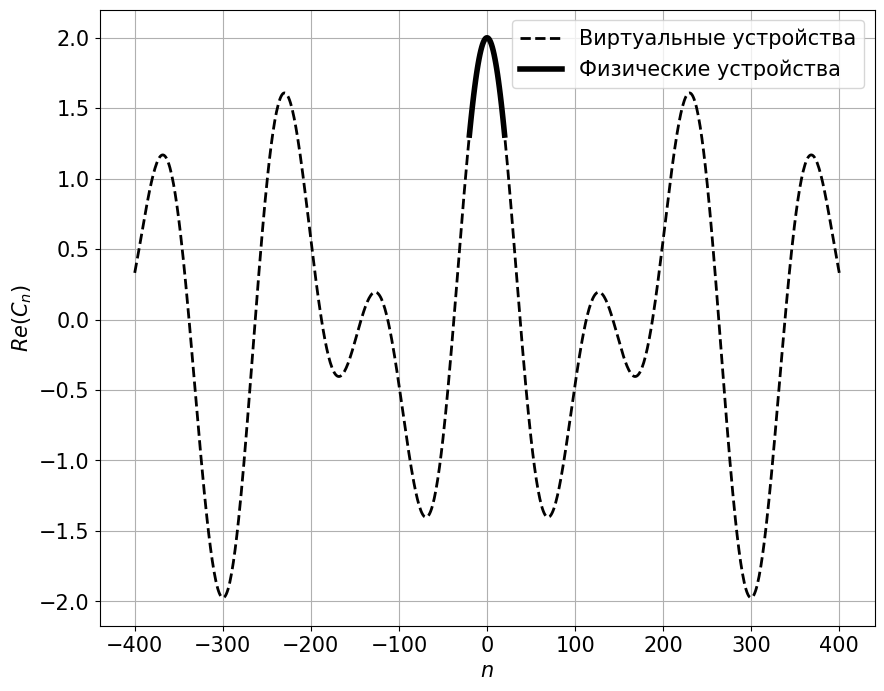

In [6]:
"""
Действительные значения коэффициентов $C_n$ принятого сигнала на приемном устройстве $n$; 
ось абсцисс $n$ - номер приёмного устройства ЦАР относительно центра;
ось ординат $Re(C_n)$ - действительные значения коэффициентов принятого сигнала на $n$-том элементе;
толстая сплошная линия обозначает значения коэффициентов $C_n$ моделируемой ЦАР, измеренные с реальных физических устройств;
тонкая штриховая линия обозначает значения коэффициентов $C_n$ виртуальной ЦАР, моделируемые той же функцией.
"""

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "Виртуальные устройства", 
         c = "#000000", linestyle = "--",linewidth = 2)
plt.plot(n_real, np.real(Cn_real), label = "Физические устройства", 
         c = "#000000", linestyle = "-",linewidth = 4)
plt.legend()
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'$Re(C_n)$')
plt.savefig("../rmarkdown_report/Begin_virtual_bw.png")

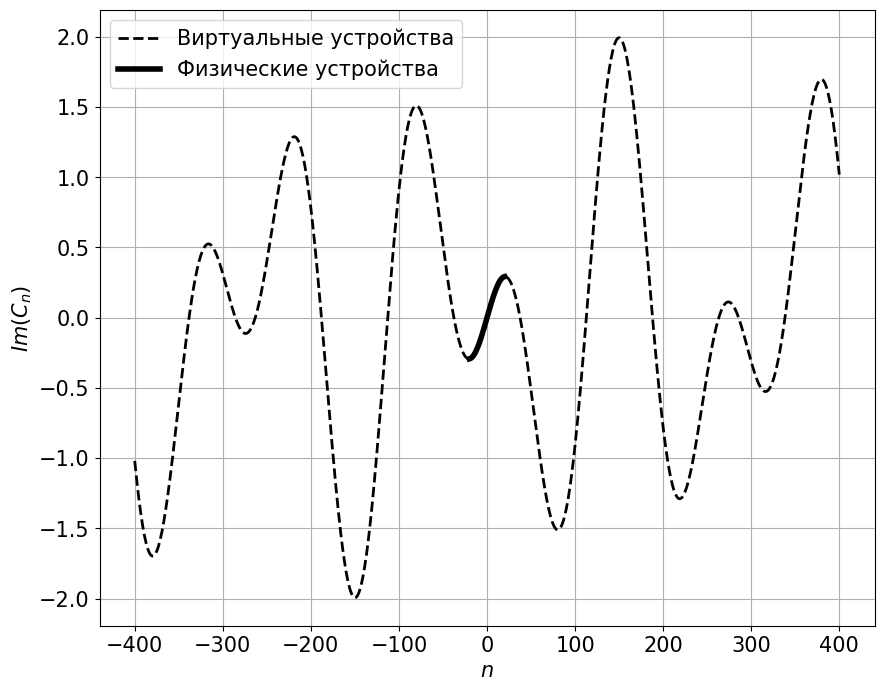

In [7]:
"""
Действительные значения коэффициентов $C_n$ принятого сигнала на приемном устройстве $n$; 
ось абсцисс $n$ - номер приёмного устройства ЦАР относительно центра;
ось ординат $Im(C_n)$ - мнимые значения коэффициентов принятого сигнала на $n$-том элементе;
толстая сплошная линия обозначает значения коэффициентов $C_n$ моделируемой ЦАР, измеренные с реальных физических устройств;
тонкая штриховая линия обозначает значения коэффициентов $C_n$ виртуальной ЦАР, моделируемые той же функцией.
"""

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.imag(Cn_virtual), 
         label = "Виртуальные устройства", 
         c = "#000000", 
         linestyle = "--", 
         linewidth = 2)
plt.plot(n_real, np.imag(Cn_real), 
         label = "Физические устройства", 
         c = "#000000", 
         linestyle = "-", 
         linewidth = 4)
plt.legend()
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'$Im(C_n)$')
plt.savefig("../rmarkdown_report/Begin_virtual_imag_bw.png")

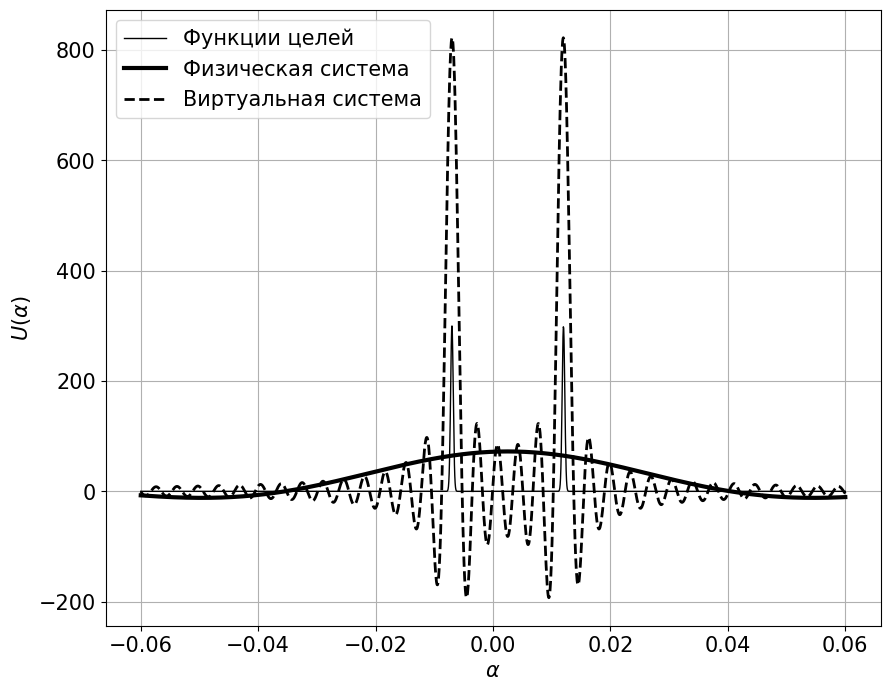

In [8]:
"""

"""

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals, 
         label = "Функции целей", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), 
         label = "Физическая система", c = "#000000", linewidth = 3)
plt.plot(alpha, np.real(U_virtual), 
         label = "Виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.legend()
plt.grid()
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$U(\alpha)$")
plt.savefig("../rmarkdown_report/Begin_target_bw.png")

## Определение Минимального расстояния Разрешения сигнала по критерию Рэлея

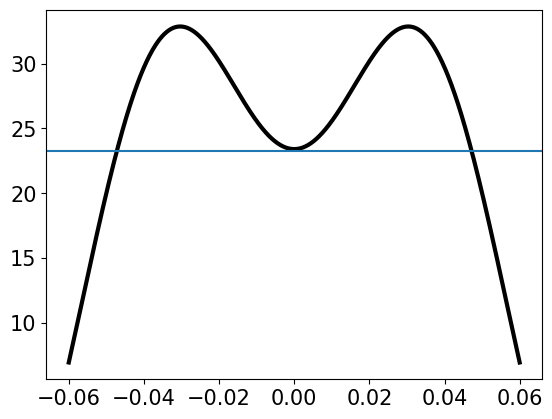

In [16]:
K = 20              # Реальное количество излучателей
NP = 400            # Виртуальное количество излучателей
k = 2 * np.pi       # Волновое число
d = 0.7             # Расстояние между излучателями
alpha0 = 0.06

alpha = np.linspace(-alpha0, alpha0, 2001)  # Угловое разрешение области

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей

for alpha_iter in alpha[:len(alpha)//2+1]:
    targets = [-alpha_iter, alpha_iter]              # Положения целей
    Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
    # Реально принятый сигнал
    U_real = U_compute(alpha, Cn_real, k, d)
    if np.max(np.real(U_real))/np.sqrt(2) <= np.real(U_real)[len(alpha)//2]:
        break
    

plt.plot(alpha, np.real(U_real), label = "Принятый сигнал, физическая система", c = "#000000", linewidth = 3)
plt.axline((-0.04, np.max(np.real(U_real))/np.sqrt(2)), (0.04, np.max(np.real(U_real))/np.sqrt(2)))

Минимальное расстояние между целями $\cfrac{Q_p}{2} = 0.0265$, при 

## Определение данных и нейросети

In [12]:
def create_data(number_of_samples = 10000, n_real = 20, n_virtual = 400, target_bounds = [-0.04, 0.04],
                k = 1, d = 1, noised = False, noise_level = 0.4, seed = 123):
    data_x = np.zeros((4 * number_of_samples, n_real * 2 + 1)) + 0j
    data_y = np.zeros((4 * number_of_samples, n_virtual * 2 + 1)) + 0j

    np.random.seed(123)
    real = np.arange(-n_real, n_real + 1)                 # Реальное перечисление номеров излучателей
    virtual = np.arange(-n_virtual, n_virtual + 1)            # Идеальное (виртуальное) число излучателей

    for sample_num in np.arange(number_of_samples):
        targets = [np.random.uniform(target_bounds[0], target_bounds[0] * 0.0001, 1),\
                  np.random.uniform(target_bounds[1] * 0.0001, target_bounds[1], 1)]
        data_x[sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)

    for sample_num in np.arange(number_of_samples):
        targets = []
        targets.append(np.random.uniform(target_bounds[0], target_bounds[0] * 0.05, 1))
        targets.append(np.abs(targets[0]))
        data_x[number_of_samples + sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[number_of_samples + sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)

    for sample_num in np.arange(number_of_samples):
        targets = []
        targets.append(np.random.uniform(target_bounds[0], 0.5 * target_bounds[0], 1))
        targets.append(np.random.uniform(0.5 * target_bounds[0], 0, 1))
        data_x[2 * number_of_samples + sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[2 * number_of_samples + sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)

    for sample_num in np.arange(number_of_samples):
        targets = []
        targets.append(np.random.uniform(0, target_bounds[1] * 0.5, 1))
        targets.append(np.random.uniform(0.5 * target_bounds[1], target_bounds[1], 1))
        data_x[3 * number_of_samples + sample_num, :] = Cn_deltaf_compute(real, k, d, targets)
        data_y[3 * number_of_samples + sample_num, :] = Cn_deltaf_compute(virtual, k, d, targets)



    return data_x, data_y

In [13]:
X, Y = create_data(number_of_samples = 10000, k = k, d = d)
order = np.random.permutation(X.shape[0])
X = X[order]
Y = Y[order]

X_val, Y_val = create_data(number_of_samples = 1000, k = k, d = d)
order_val = np.random.permutation(X_val.shape[0])
X_val = X_val[order_val]
Y_val = Y_val[order_val]

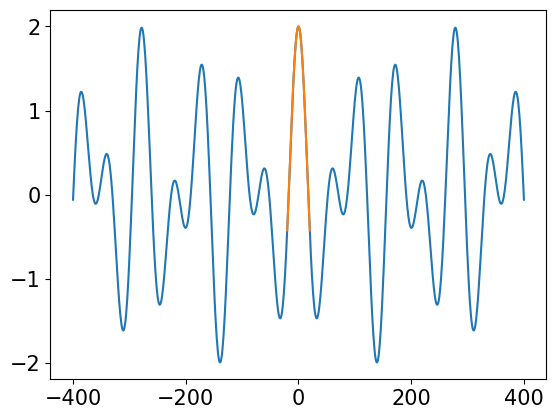

In [19]:
plt.plot(np.arange(-NP, NP+1), np.real(Y[8002,:]))
plt.plot(np.arange(-K, K + 1), np.real(X[8002,:]))

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(my_seed)
torch.use_deterministic_algorithms(False)
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        x = F.selu(self.fc1(x))
        x = self.dropout(x)
        x = F.selu(self.fc2(x))
        x = self.dropout(x)
        x = F.selu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

    def inference(self, x):
        x = F.selu(self.fc1(x))
        x = F.selu(self.fc2(x))
        x = F.selu(self.fc3(x))
        x = self.fc4(x)
        return x

In [15]:
X_tensor_real  = torch.tensor(np.real(X), dtype = torch.float, device=device)
Y_tensor_real = torch.tensor(np.real(Y), dtype = torch.float, device=device)
X_val_tensor_real = torch.tensor(np.real(X_val), dtype = torch.float, device=device)
Y_val_tensor_real = torch.tensor(np.real(Y_val), dtype = torch.float, device=device)

X_tensor_imag  = torch.tensor(np.imag(X), dtype = torch.float, device=device)
Y_tensor_imag = torch.tensor(np.imag(Y), dtype = torch.float, device=device)
X_val_tensor_imag = torch.tensor(np.imag(X_val), dtype = torch.float, device=device)
Y_val_tensor_imag = torch.tensor(np.imag(Y_val), dtype = torch.float, device=device)

In [16]:
model_superresolution_real = RegressionNet(input_size = 2 * K + 1, hidden_size = 500,
                                      output_size = 2 * NP + 1, dropout_prob = 0.00)
model_superresolution_imag = RegressionNet(input_size = 2 * K + 1, hidden_size = 500,
                                      output_size = 2 * NP + 1, dropout_prob = 0.00)

In [17]:
model_superresolution_real.load_state_dict(torch.load("model_params_real", map_location = device))
model_superresolution_imag.load_state_dict(torch.load("model_params_imag", map_location = device))

<All keys matched successfully>

In [15]:
rate = 1e-4
batch_size = 400
num_epochs = 400

criterion = nn.MSELoss()
optimizer_real = torch.optim.Adam(model_superresolution_real.parameters(), lr = rate)
optimizer_imag = torch.optim.Adam(model_superresolution_imag.parameters(), lr = rate)

optimizer_real.zero_grad()
optimizer_imag.zero_grad()

In [26]:
model_superresolution_real.to(device)
model_superresolution_imag.to(device)
for epoch in range(num_epochs):
    running_loss_real = 0.0
    running_loss_imag = 0.0
    order = np.random.permutation(X_tensor_real.shape[0])
    for i in range(0, X_tensor_real.shape[0], batch_size): # пакеты по 10 изображений
        indexes = order[i:i+batch_size]
        batch_inputs_real = X_tensor_real[indexes]
        batch_labels_real = Y_tensor_real[indexes]

        batch_inputs_imag = X_tensor_imag[indexes]
        batch_labels_imag = Y_tensor_imag[indexes]

        # обнуление градиентов
        optimizer_real.zero_grad()
        optimizer_imag.zero_grad()

        # передача данных через модель
        outputs_real = model_superresolution_real(batch_inputs_real)
        outputs_imag = model_superresolution_imag(batch_inputs_imag)

        # расчет функции потерь
        loss_real = criterion(outputs_real, batch_labels_real)
        loss_imag = criterion(outputs_imag, batch_labels_imag)

        # обратное распространение ошибки и обновление весов
        loss_real.backward()
        loss_imag.backward()
        optimizer_real.step()
        optimizer_imag.step()
        # суммирование потерь на каждой эпохе
        running_loss_real += loss_real.item()
        running_loss_imag += loss_imag.item()

    if (epoch+1) % 3 == 0:
        with torch.no_grad():
            loss_val_real = criterion(model_superresolution_real.inference(X_val_tensor_real), Y_val_tensor_real)
            loss_val_imag = criterion(model_superresolution_imag.inference(X_val_tensor_imag), Y_val_tensor_imag)
            print("Val Epoch %d loss real: $.5f" % (epoch + 1), loss_val_real.item())
            print("Val Epoch %d loss imag: $.5f" % (epoch + 1), loss_val_imag.item())

    # вывод потерь на каждой эпохе
    print('Epoch %d loss real: %.5f' % (epoch + 1, running_loss_real / X_tensor_real.shape[0] * batch_size))
    print('Epoch %d loss imag: %.5f' % (epoch + 1, running_loss_imag / X_tensor_imag.shape[0] * batch_size))

Epoch 1 loss real: 0.05254
Epoch 1 loss imag: 0.10655
Epoch 2 loss real: 0.05062
Epoch 2 loss imag: 0.10791
Val Epoch 3 loss real: $.5f 0.046108923852443695
Val Epoch 3 loss imag: $.5f 0.10571524500846863
Epoch 3 loss real: 0.04980
Epoch 3 loss imag: 0.10653
Epoch 4 loss real: 0.05196
Epoch 4 loss imag: 0.10612
Epoch 5 loss real: 0.05054
Epoch 5 loss imag: 0.10584
Val Epoch 6 loss real: $.5f 0.05797712132334709
Val Epoch 6 loss imag: $.5f 0.10706476867198944
Epoch 6 loss real: 0.05001
Epoch 6 loss imag: 0.10513
Epoch 7 loss real: 0.05251
Epoch 7 loss imag: 0.10524
Epoch 8 loss real: 0.05082
Epoch 8 loss imag: 0.10629
Val Epoch 9 loss real: $.5f 0.0644269734621048
Val Epoch 9 loss imag: $.5f 0.10590571165084839
Epoch 9 loss real: 0.04894
Epoch 9 loss imag: 0.10607
Epoch 10 loss real: 0.05893
Epoch 10 loss imag: 0.10649
Epoch 11 loss real: 0.05236
Epoch 11 loss imag: 0.10630
Val Epoch 12 loss real: $.5f 0.05368427559733391
Val Epoch 12 loss imag: $.5f 0.10392433404922485
Epoch 12 loss re

In [27]:
torch.save(model_superresolution_real.state_dict(), "model_params_real")
torch.save(model_superresolution_imag.state_dict(), "model_params_imag")

In [6]:
model_superresolution_real.to(torch.device("cpu"))
model_superresolution_imag.to(torch.device("cpu"))

NameError: name 'model_superresolution_real' is not defined

In [18]:
targets = [-0.005, 0.005]              # Положения целей
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

In [19]:
## Сохранение результатов работы модели

data_frame_symmetric = pd.DataFrame(np.hstack([np.real(Cn_nn).reshape(-1, 1), 
                                               np.imag(Cn_nn).reshape(-1, 1), 
                                               np.arange(-NP, NP + 1).reshape(-1, 1)]),
                                   columns = ["Cn_real", "Cn_imag", "n"])
data_frame_symmetric.to_csv("../sheets_output/Cn_nn_results.csv")

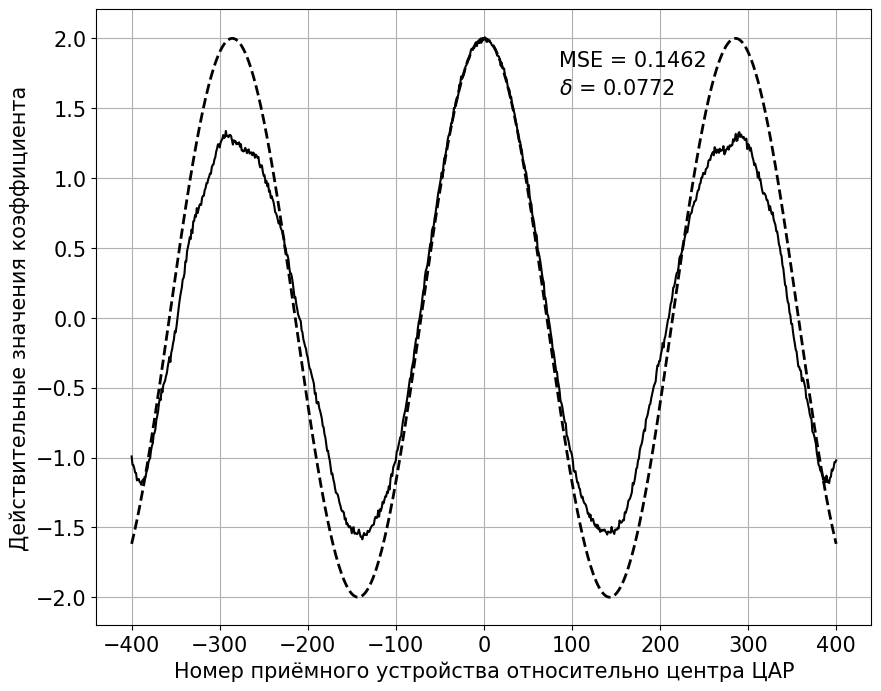

In [20]:
d11 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D11 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / np.sum((np.real(Cn_virtual)) ** 2)

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
#plt.legend()
plt.grid()
plt.text(85,
         1.8,
         "MSE = %.4f" % d11,
        fontsize = 15)
plt.text(85,
         1.6,
         "$\delta$ = %.4f" % D11,
        fontsize = 15)
plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
plt.ylabel("Действительные значения коэффициента")
plt.savefig("../rmarkdown_report/complete_virtual1_real_bw.png")

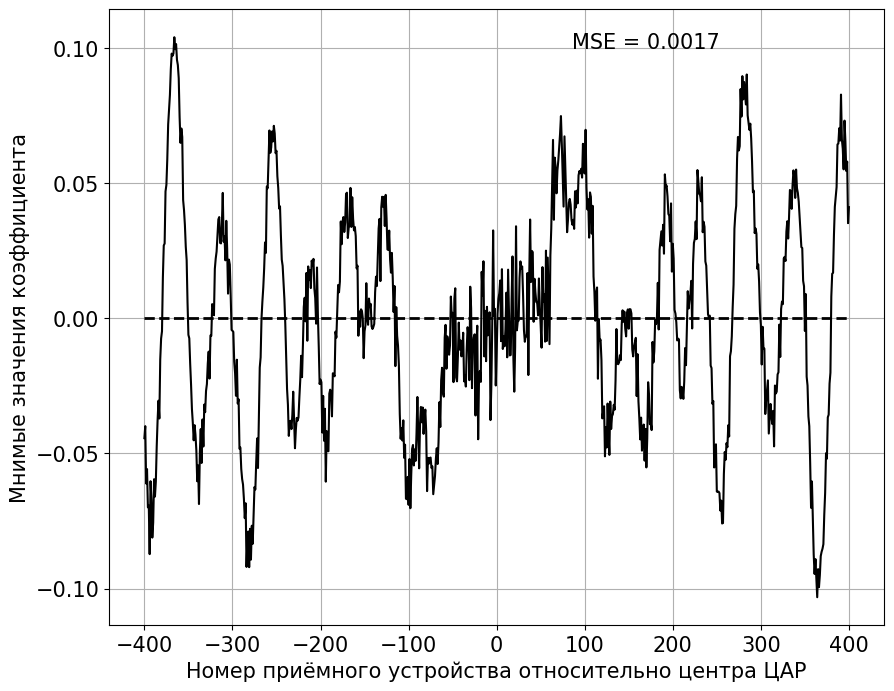

In [27]:
d12 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]


plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.imag(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.imag(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
#plt.legend()
plt.text(85,
         0.10,
         "MSE = %.4f" % d12,
        fontsize = 15)
plt.grid()
plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
plt.ylabel("Мнимые значения коэффициента")
plt.savefig("../rmarkdown_report/complete_virtual1_imag_bw.png")

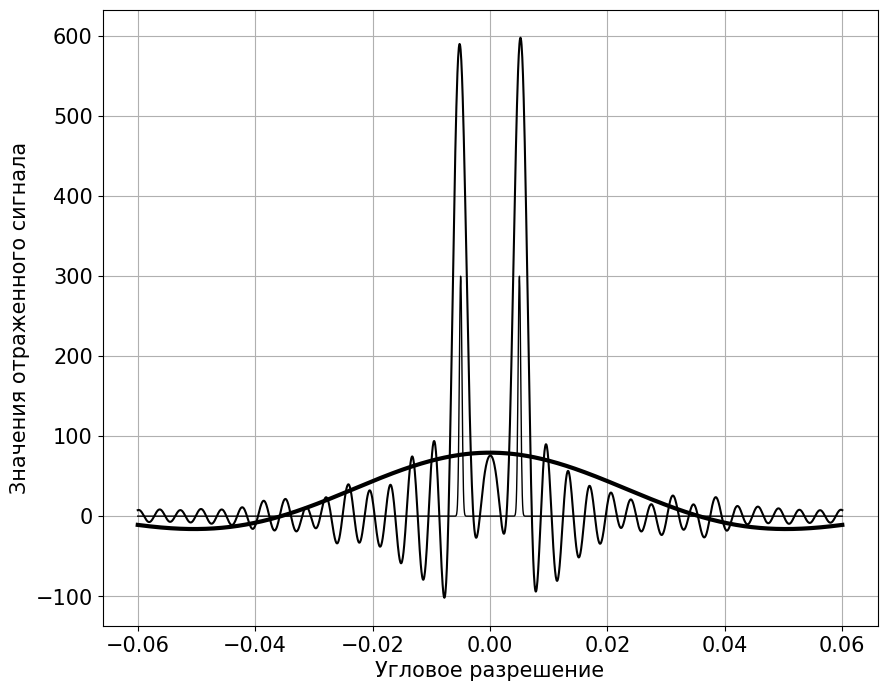

In [21]:
plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals, label = "Функции целей", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), label = "Принятый сигнал, физическая система", c = "#000000", linewidth = 3)
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn), label = "Принятый сигнал, нейронная сеть", c = "#000000")
#plt.legend()
plt.grid()
plt.xlabel("Угловое разрешение")
plt.ylabel("Значения отраженного сигнала")
plt.savefig("../rmarkdown_report/Complete1_target_bw.png")

## Несимметричные цели

In [22]:
targets = [-0.027, 0.017]              # Положения целей
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

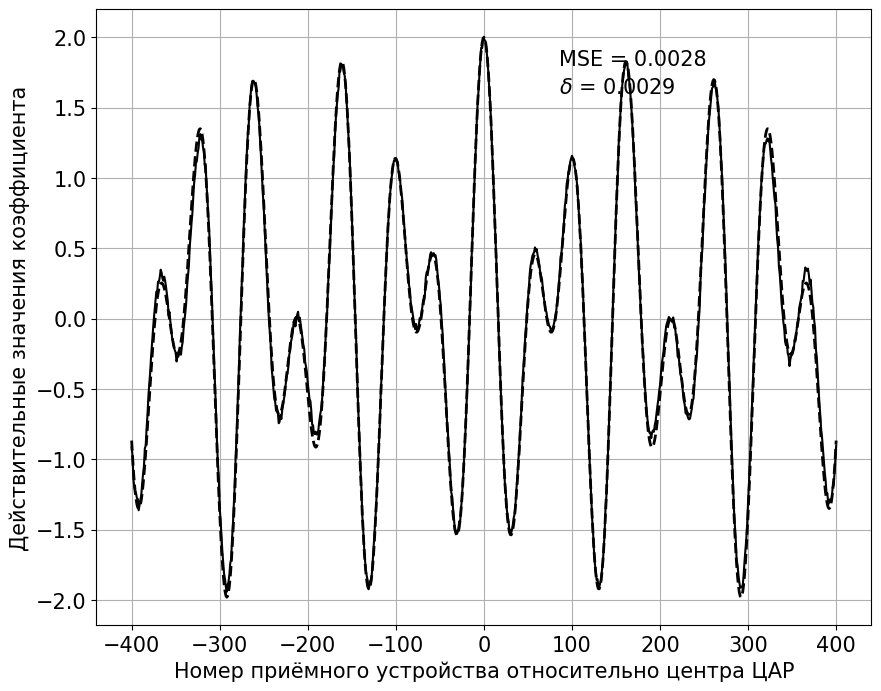

In [23]:
d21 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D21 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / np.sum((np.real(Cn_virtual)) ** 2)

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
#plt.legend()
plt.grid()
plt.text(85,
         1.8,
         "MSE = %.4f" % d21,
        fontsize = 15)
plt.text(85,
         1.6,
         "$\delta$ = %.4f" % D21,
        fontsize = 15)
plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
plt.ylabel("Действительные значения коэффициента")
plt.savefig("../rmarkdown_report/complete_virtual2_real_bw.png")

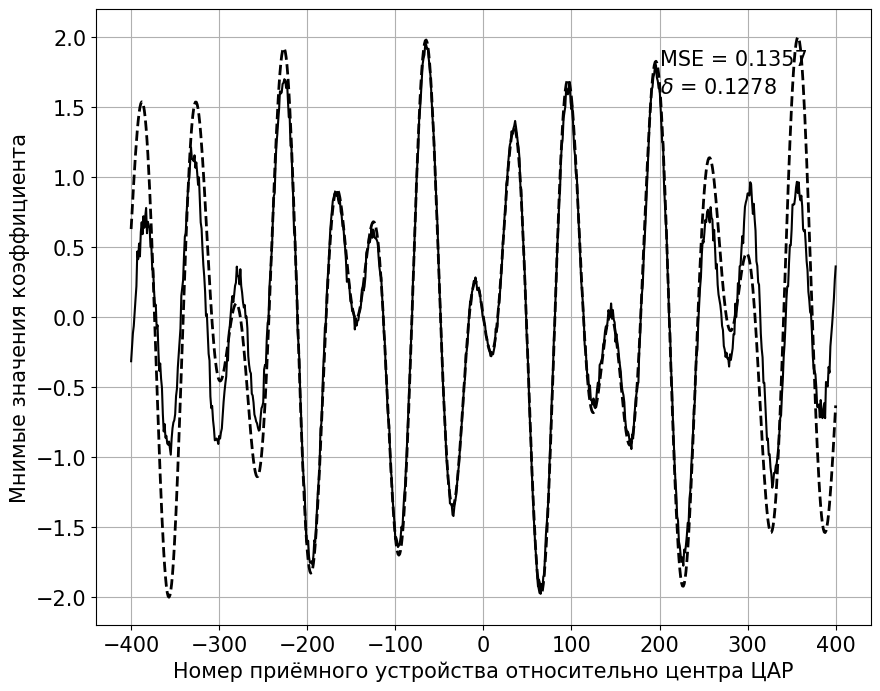

In [24]:
d22 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D22 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / np.sum((np.imag(Cn_virtual)) ** 2)


plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.imag(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.imag(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
#plt.legend()
plt.text(200,
         1.8,
         "MSE = %.4f" % d22,
        fontsize = 15)
plt.text(200,
         1.6,
         "$\delta$ = %.4f" % D22,
        fontsize = 15)
plt.grid()
plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
plt.ylabel("Мнимые значения коэффициента")
plt.savefig("../rmarkdown_report/complete_virtual2_imag_bw.png")

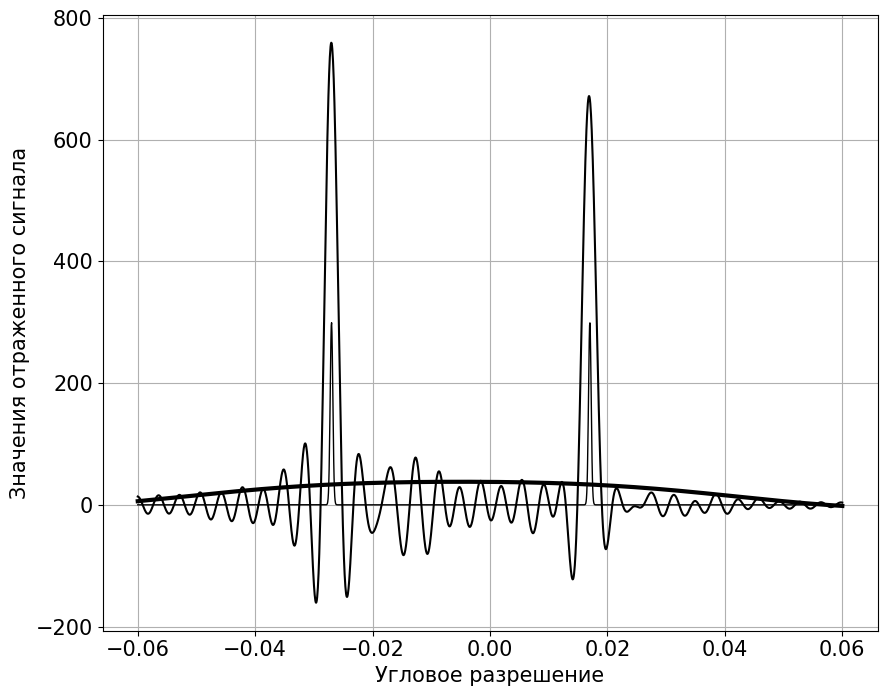

In [25]:
plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals, label = "Функции целей", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), label = "Принятый сигнал, физическая система", c = "#000000", linewidth = 3)
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn), label = "Принятый сигнал, нейронная сеть", c = "#000000")
#plt.legend()
plt.grid()
plt.xlabel("Угловое разрешение")
plt.ylabel("Значения отраженного сигнала")
plt.savefig("../rmarkdown_report/Complete2_target_bw.png")

## Односторонние цели

In [60]:
targets = [0.005, 0.0195]              # Положения целей
n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей
n_virtual = np.arange(-NP, NP + 1)            # Идеальное (виртуальное) число излучателей

Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
Cn_virtual = Cn_deltaf_compute(n_virtual, k, d, targets)        # Виртуальные Cn излучателей (как хотим чтобы было)

Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()

# Для отрисовки целей
signals = signal_gauss(alpha, alpha0 = targets, scale = 0.00000005, amp = amplitude)

# Реально принятый сигнал
U_real = U_compute(alpha, Cn_real, k, d)

# Как должно быть по факту
U_virtual = U_compute(alpha, Cn_virtual, k, d)

# Принятый сигнал виртуальной системой
U_nn = U_compute(alpha, Cn_nn, k, d)

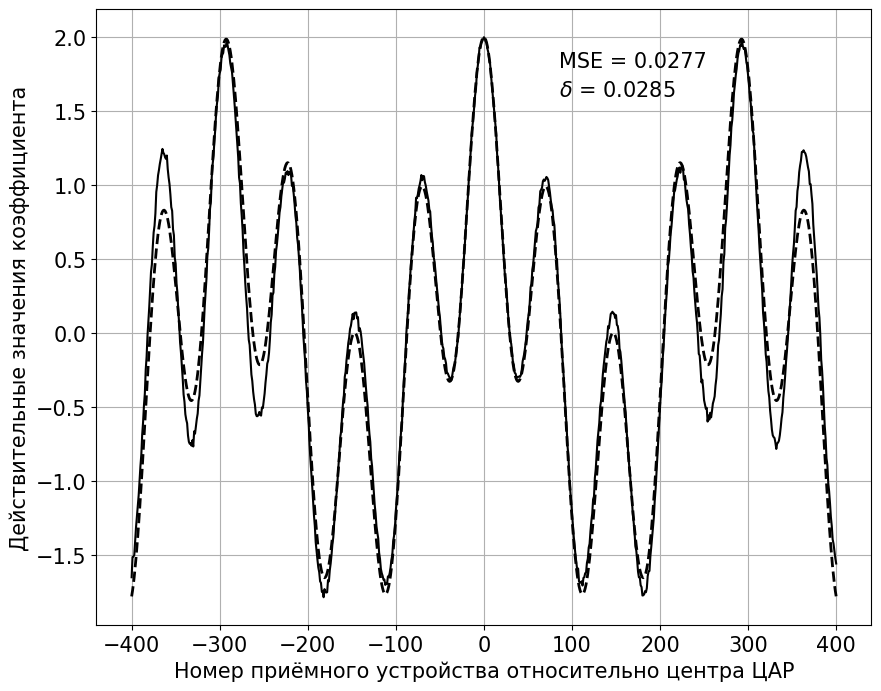

In [61]:
d31 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D31 = np.sum((np.real(Cn_virtual) - np.real(np.array(Cn_nn))) ** 2) / np.sum((np.real(Cn_virtual)) ** 2)

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.real(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.real(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
#plt.legend()
plt.grid()
plt.text(85,
         1.8,
         "MSE = %.4f" % d31,
        fontsize = 15)
plt.text(85,
         1.6,
         "$\delta$ = %.4f" % D31,
        fontsize = 15)
plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
plt.ylabel("Действительные значения коэффициента")
plt.savefig("../rmarkdown_report/complete_virtual3_real_bw.png")

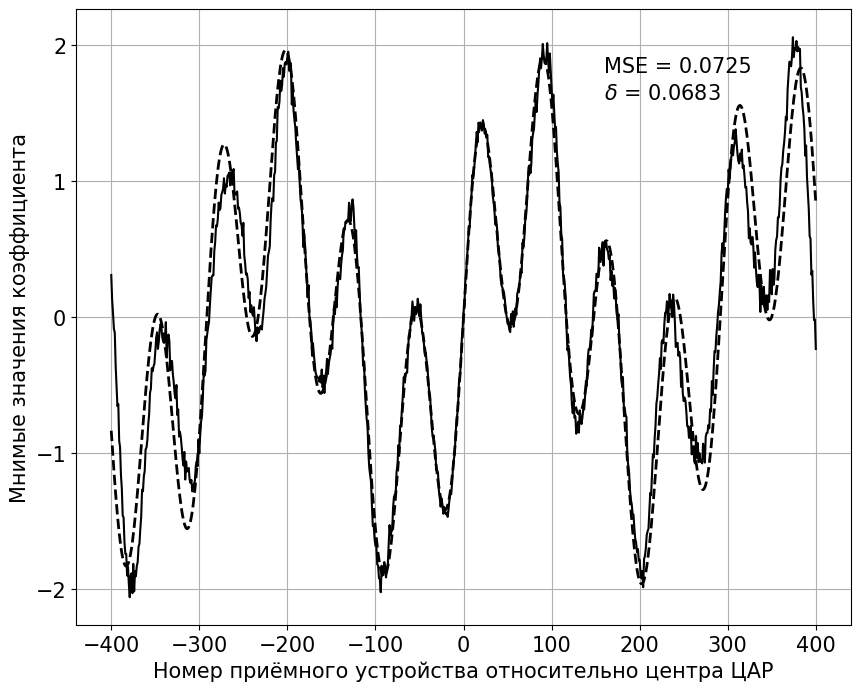

In [62]:
d32 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / n_virtual.shape[0]
D32 = np.sum((np.imag(Cn_virtual) - np.imag(np.array(Cn_nn))) ** 2) / np.sum((np.imag(Cn_virtual)) ** 2)


plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(n_virtual, np.imag(Cn_virtual), label = "Виртуальная система, желаемые значения", linewidth = 2, c = "#000000", linestyle = "--")
plt.plot(n_virtual, np.imag(Cn_nn), label = "Прогноз нейросетевой моделью", linestyle = "-", c = "#000000")
#plt.legend()
plt.text(160,
         1.8,
         "MSE = %.4f" % d32,
        fontsize = 15)
plt.text(160,
         1.6,
         "$\delta$ = %.4f" % D32,
        fontsize = 15)
plt.grid()
plt.xlabel("Номер приёмного устройства относительно центра ЦАР")
plt.ylabel("Мнимые значения коэффициента")
plt.savefig("../rmarkdown_report/complete_virtual3_imag_bw.png")

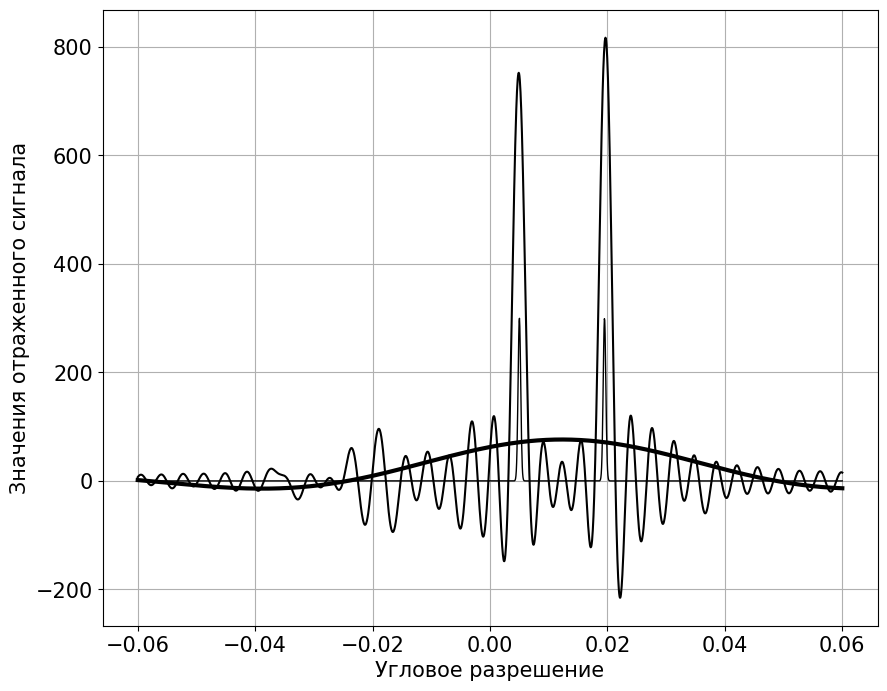

In [63]:
plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(alpha, signals, label = "Функции целей", c = "#000000", linewidth = 1)
plt.plot(alpha, np.real(U_real), label = "Принятый сигнал, физическая система", c = "#000000", linewidth = 3)
#plt.plot(alpha, np.real(U_virtual), label = "Принятый сигнал, виртуальная система", c = "#000000", linewidth = 2, linestyle = "--")
plt.plot(alpha, np.real(U_nn), label = "Принятый сигнал, нейронная сеть", c = "#000000")
#plt.legend()
plt.grid()
plt.xlabel("Угловое разрешение")
plt.ylabel("Значения отраженного сигнала")
plt.savefig("../rmarkdown_report/Complete3_target_bw.png")

## Определение для симметричных целей $Q_p$ и $Q_{0.5}$

In [76]:
alpha0 = 0.08
K = 20
NP = 400
alpha = np.linspace(-alpha0, alpha0, 15001)  # Угловое разрешение области

n_real = np.arange(-K, K + 1)                 # Реальное перечисление номеров излучателей


# TODO: theta_0.5 рассчитать для модели нейронной сети
alpha_cur = len(alpha)//4
q_p = []
q05 = []
for n in range(20, NP+1):
    for alpha_idx in range(alpha_cur, len(alpha)//2):
        targets = [alpha[alpha_idx], alpha[-alpha_idx]]              # Положения целей
        Cn_real = Cn_deltaf_compute(n_real, k, d, targets)              # Реальные Cn излучателей от -K до K включительно
        Cn_nn = model_superresolution_real(torch.tensor(np.real(Cn_real), dtype = torch.float)).detach() + 1j * model_superresolution_imag(torch.tensor(np.imag(Cn_real), dtype = torch.float)).detach()
        # Реально принятый сигнал
        U_nn = U_compute(alpha, Cn_nn[NP - n:NP + n + 1], k, d)
        if np.max(np.array(np.real(U_nn)))/np.sqrt(2) <= np.real(U_nn)[len(alpha)//2]:
            alpha_cur = alpha_idx
            q_p.append(alpha[alpha_idx])
            print(f"n = {n} completed!, alpha = {alpha[alpha_idx]}")
            break
            

n = 20 completed!, alpha = -0.026464
n = 21 completed!, alpha = -0.025226666666666668
n = 22 completed!, alpha = -0.024106666666666665
n = 23 completed!, alpha = -0.023093333333333334
n = 24 completed!, alpha = -0.022143999999999997
n = 25 completed!, alpha = -0.021290666666666666
n = 26 completed!, alpha = -0.020479999999999998
n = 27 completed!, alpha = -0.019754666666666663
n = 28 completed!, alpha = -0.019050666666666667
n = 29 completed!, alpha = -0.018431999999999997
n = 30 completed!, alpha = -0.017824
n = 31 completed!, alpha = -0.01725866666666666
n = 32 completed!, alpha = -0.016736
n = 33 completed!, alpha = -0.01623466666666666
n = 34 completed!, alpha = -0.01578666666666667
n = 35 completed!, alpha = -0.015338666666666667
n = 36 completed!, alpha = -0.014933333333333326
n = 37 completed!, alpha = -0.014528
n = 38 completed!, alpha = -0.014154666666666663
n = 39 completed!, alpha = -0.013791999999999999
n = 40 completed!, alpha = -0.013461333333333325
n = 41 completed!, alp

n = 188 completed!, alpha = -0.0029759999999999925
n = 189 completed!, alpha = -0.0029653333333333337
n = 190 completed!, alpha = -0.002944000000000002
n = 191 completed!, alpha = -0.0029333333333333295
n = 192 completed!, alpha = -0.0029226666666666568
n = 193 completed!, alpha = -0.002911999999999998
n = 194 completed!, alpha = -0.0028906666666666664
n = 195 completed!, alpha = -0.0028799999999999937
n = 196 completed!, alpha = -0.002869333333333335
n = 197 completed!, alpha = -0.0028480000000000033
n = 198 completed!, alpha = -0.0028373333333333306
n = 199 completed!, alpha = -0.002826666666666658
n = 200 completed!, alpha = -0.0028053333333333264
n = 201 completed!, alpha = -0.0027946666666666675
n = 202 completed!, alpha = -0.002783999999999995
n = 203 completed!, alpha = -0.0027626666666666633
n = 204 completed!, alpha = -0.0027519999999999906
n = 205 completed!, alpha = -0.0027413333333333317
n = 206 completed!, alpha = -0.00272
n = 207 completed!, alpha = -0.0027093333333333275

n = 351 completed!, alpha = -0.0018453333333333238
n = 352 completed!, alpha = -0.0018453333333333238
n = 353 completed!, alpha = -0.0018453333333333238
n = 354 completed!, alpha = -0.001834666666666665
n = 355 completed!, alpha = -0.001834666666666665
n = 356 completed!, alpha = -0.001834666666666665
n = 357 completed!, alpha = -0.001834666666666665
n = 358 completed!, alpha = -0.0018239999999999923
n = 359 completed!, alpha = -0.0018239999999999923
n = 360 completed!, alpha = -0.0018239999999999923
n = 361 completed!, alpha = -0.0018133333333333335
n = 362 completed!, alpha = -0.0018133333333333335
n = 363 completed!, alpha = -0.0018133333333333335
n = 364 completed!, alpha = -0.0018026666666666608
n = 365 completed!, alpha = -0.0018026666666666608
n = 366 completed!, alpha = -0.0018026666666666608
n = 367 completed!, alpha = -0.0018026666666666608
n = 368 completed!, alpha = -0.001792000000000002
n = 369 completed!, alpha = -0.001792000000000002
n = 370 completed!, alpha = -0.001792

In [77]:
# Рассчитать theta_p и theta_0.5 для моделируемых источников по функции экспоненты
alpha_cur = len(alpha)//4
q_p_virtual = []
q05_virtual = []
for n in range(20, NP+1):
    for alpha_idx in range(alpha_cur, len(alpha)//2):
        targets = [alpha[alpha_idx], alpha[-alpha_idx]]              # Положения целей
        Cn_virtual = Cn_deltaf_compute(np.arange(-n, n+1), k, d, targets)              # Реальные Cn излучателей от -K до K включительно
        # Реально принятый сигнал
        U_nn = U_compute(alpha, Cn_virtual, k, d)
        if np.max(np.array(np.real(U_nn)))/np.sqrt(2) <= np.real(U_nn)[len(alpha)//2]:
            alpha_cur = alpha_idx
            q_p_virtual.append(alpha[alpha_idx])
            print(f"n = {n} completed!, alpha = {alpha[alpha_idx]}")
            break

n = 20 completed!, alpha = -0.026549333333333335
n = 21 completed!, alpha = -0.025322666666666667
n = 22 completed!, alpha = -0.024191999999999998
n = 23 completed!, alpha = -0.02315733333333333
n = 24 completed!, alpha = -0.022218666666666664
n = 25 completed!, alpha = -0.021343999999999995
n = 26 completed!, alpha = -0.020533333333333334
n = 27 completed!, alpha = -0.019786666666666668
n = 28 completed!, alpha = -0.01909333333333333
n = 29 completed!, alpha = -0.018442666666666663
n = 30 completed!, alpha = -0.01784533333333333
n = 31 completed!, alpha = -0.017280000000000004
n = 32 completed!, alpha = -0.01674666666666666
n = 33 completed!, alpha = -0.016245333333333334
n = 34 completed!, alpha = -0.015776
n = 35 completed!, alpha = -0.015327999999999994
n = 36 completed!, alpha = -0.014911999999999995
n = 37 completed!, alpha = -0.014506666666666668
n = 38 completed!, alpha = -0.014133333333333331
n = 39 completed!, alpha = -0.013770666666666667
n = 40 completed!, alpha = -0.013429

n = 187 completed!, alpha = -0.0028906666666666664
n = 188 completed!, alpha = -0.0028799999999999937
n = 189 completed!, alpha = -0.002858666666666662
n = 190 completed!, alpha = -0.0028480000000000033
n = 191 completed!, alpha = -0.0028373333333333306
n = 192 completed!, alpha = -0.002815999999999999
n = 193 completed!, alpha = -0.0028053333333333264
n = 194 completed!, alpha = -0.002783999999999995
n = 195 completed!, alpha = -0.002773333333333336
n = 196 completed!, alpha = -0.0027626666666666633
n = 197 completed!, alpha = -0.0027413333333333317
n = 198 completed!, alpha = -0.002730666666666659
n = 199 completed!, alpha = -0.00272
n = 200 completed!, alpha = -0.0027093333333333275
n = 201 completed!, alpha = -0.002687999999999996
n = 202 completed!, alpha = -0.002677333333333337
n = 203 completed!, alpha = -0.0026666666666666644
n = 204 completed!, alpha = -0.0026559999999999917
n = 205 completed!, alpha = -0.00263466666666666
n = 206 completed!, alpha = -0.0026240000000000013
n =

n = 350 completed!, alpha = -0.0015466666666666684
n = 351 completed!, alpha = -0.0015359999999999957
n = 352 completed!, alpha = -0.0015359999999999957
n = 353 completed!, alpha = -0.0015253333333333369
n = 354 completed!, alpha = -0.0015253333333333369
n = 355 completed!, alpha = -0.0015253333333333369
n = 356 completed!, alpha = -0.0015146666666666642
n = 357 completed!, alpha = -0.0015146666666666642
n = 358 completed!, alpha = -0.0015039999999999915
n = 359 completed!, alpha = -0.0015039999999999915
n = 360 completed!, alpha = -0.0015039999999999915
n = 361 completed!, alpha = -0.0014933333333333326
n = 362 completed!, alpha = -0.0014933333333333326
n = 363 completed!, alpha = -0.00148266666666666
n = 364 completed!, alpha = -0.00148266666666666
n = 365 completed!, alpha = -0.00148266666666666
n = 366 completed!, alpha = -0.001472000000000001
n = 367 completed!, alpha = -0.001472000000000001
n = 368 completed!, alpha = -0.001472000000000001
n = 369 completed!, alpha = -0.001461333

In [78]:
q_p = np.round(np.abs(np.array(q_p)), 7)
q_p_virtual = np.round(np.abs(np.array(q_p_virtual)), 7)
qp_df = pd.DataFrame({"qp_nn": q_p, "qp_virtual": q_p_virtual, "n": np.arange(K, NP+1)})
qp_df.to_csv("../sheets_output/qp_nn.csv", index = False)

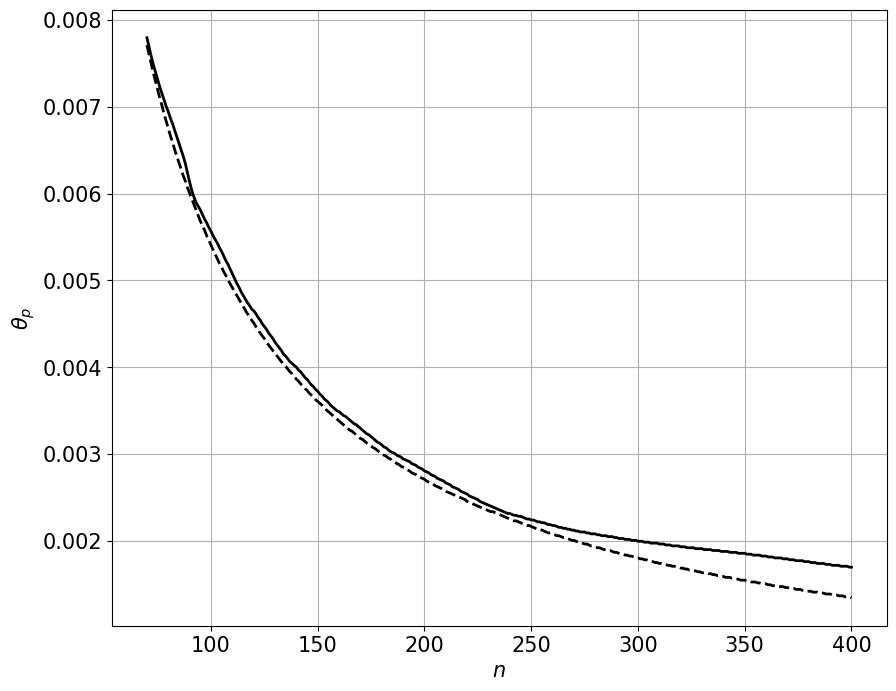

In [81]:
qp_df_subset = qp_df.query("n >= 70")

plt.figure(figsize = (10, 8), dpi = 100)
plt.plot(qp_df_subset["n"], qp_df_subset["qp_nn"], c = "#000000", linewidth = 2, label = "FFNN")
plt.plot(qp_df_subset["n"], qp_df_subset["qp_virtual"], c = "#000000", linewidth = 2, linestyle = "--", label = "Virtual")
plt.ylabel(r"$\theta_p$")
plt.xlabel(r"$n$")
plt.grid()
plt.

1. Bhaskar D., Rao B. D., Hari K.V.S. Performance analysis of ROOT – MUSIC // IEEE Trans. on Acoustics, Speech, and Signal Processing. 1989. Vol. ASSP – 37, pp. 1939-1949.

2. Cetin M., Karl W. Feature-enhanced synthetic aperture radar image formation based on nonquadratic regularization // IEEE Trans. Image Processing. 2001. Vol. 10, №. 4, pp. 623–631.

3. Quinquis A., Radoi E., Totir F. Some radar imagery results using superresolution techniques // IEEE Trans. Antennas and Propagation. 2004.Vol. 52, № 5, pp. 1230-1244, 

4. Changyin S, Zheng B.  Super-resolution algorithm for instantaneous ISAR imaging // Electron. Letters. 2000. 36, № 3, pp. 253-255.

5. М.В. Ратынский. Адаптация и сверхразрешение абыстродействующих антенных решетках. Радио и связ,М  2003 г. с.199.

6. Herman M. A., Strohmer T. High-resolution radar via compressed sensing //  IEEE Trans. Signal Processing. 2009. Vol. 57, № 6, pp. 2275–2284.

7. Lagovsky B.А. Image Restoration of the Objects with Superresolution on the Basis of Spline – Interpolation //  Progress In Electromagnetics Research Symposium (PIERS 2012-Moscow), PIERS Proceedings 2012. pp. 989 – 992.

8. Лаговский Б.А., Самохин А.Б. Алгебраические методы восстановления изображения источников радиоизлучения с повышенным угловым разрешением //  Электромагнитные волны и электронные  системы.  2009, № 9, т.14,  с. 7-18.

9. Лаговский Б.А. Методы повышения эффективного углового  разрешения малоразмерных целей в задачах радионавигации  и  радиолокации.  // Антенны. 2007,  № 9(124),  с. 50 -55.

10. Лаговский Б.А. Восстановление изображения групповой цели цифровыми антенными решетками // Антенны. 2011. № 2(165), с. 40 -46.

11. Лаговский Б.А., Рубинович Е.Я. Алгоритмы цифровой обработки данных измерений, обеспечивающие угловое сверхразрешение. Мехатроника, автоматизация, управление. 2021;22(7):349-356. https://doi.org/10.17587/mau.22.349-356

12. Тормозов, В. С. Настройка, обучение и тестирование нейронной сети долгой краткосрочной памяти для задачи распознавания образов / В. С. Тормозов, А. Л. Золкин, К. А. Василенко // Промышленные АСУ и контроллеры. – 2020. – № 3. – С. 52-57. – DOI 10.25791/asu.3.2020.1171. – EDN JJWSSG.

13. Минаев Е. Ю., Кутикова В. В., Никоноров А. В. Трекинг объектов в видеопотоке на основе сверточных нейронных сетей и фрактального анализа //Сборник трудов IV международной конференции и молодежной школы «Информационные технологии и нанотехнологии»(ИТНТ-2018)-Самара: Новая техника. – 2018. – С. 2792-2798.

14. Козар Б. А., Кугуракова В. В., Сахибгареева Г. Ф. Структуризация сущностей естественного текста с использованием нейронных сетей для генерации трехмерных сцен //Программные продукты и системы. – 2022. – Т. 35. – №. 3. – С. 329-339.

15. Семенюк В. В., Складчиков М. В. Разработка алгоритма распознавания эмоций человека с использованием сверточной нейронной сети на основе аудиоданных //Информатика. – 2022. – Т. 19. – №. 4.

16. Яшин В. И. РАСТУЩИЕ НЕЙРОННЫЕ СЕТИ В РОБОТОТЕХНИКЕ //Роботизация Вооружённых Сил Российской Федерации. – 2020. – С. 279-284.

17. Ахтёров А. В., Кирильченко А. А. Основы теоретической робототехники. Искусственные нейронные сети.(Обзор) //Препринты Института прикладной математики им. МВ Келдыша РАН. – 2008. – №. 0. – С. 2-20.

18. Сукина С. А. Нейронные сети //Новая наука: стратегии и векторы развития. – 2016. – №. 5 (82). – С. 248.

19. Ямашкин А. А., Ямашкин С. А. Использование нейронных сетей прямого распространения для ландшафтного картографирования на базе космических снимков //Геодезия и картография. – 2014. – №. 11. – С. 52-58.

20. Иванько А. Ф., Иванько М. А., Сизова Ю. А. Нейронные сети: общие технологические характеристики //Научное обозрение. Технические науки. – 2019. – №. 2. – С. 17-23.

21. Дычков И. Н. Сверточные нейронные сети //Тенденции развития науки и образования. – 2021. – №. 73-1. – С. 38-41.

## SELU функция активации

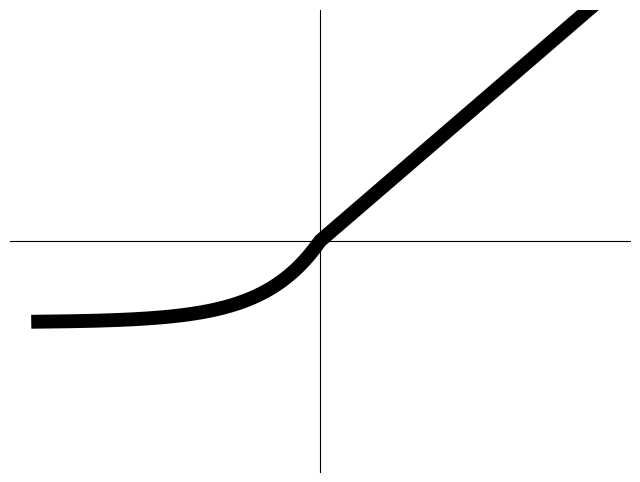

In [33]:
scale = 1.0507009873554804934193349852946
alpha = 1.6732632423544

x_grid = np.linspace(-5, 5, 10000)
zeros = np.zeros(10000)

SELU = lambda x: scale * (np.maximum(zeros, x) + np.minimum(zeros, alpha * (np.exp(x) - 1)))

plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x_grid, SELU(x_grid),c="#000000", linewidth = 10)
plt.ylim((-5, 5))
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.savefig("SELU.svg")

## Linear

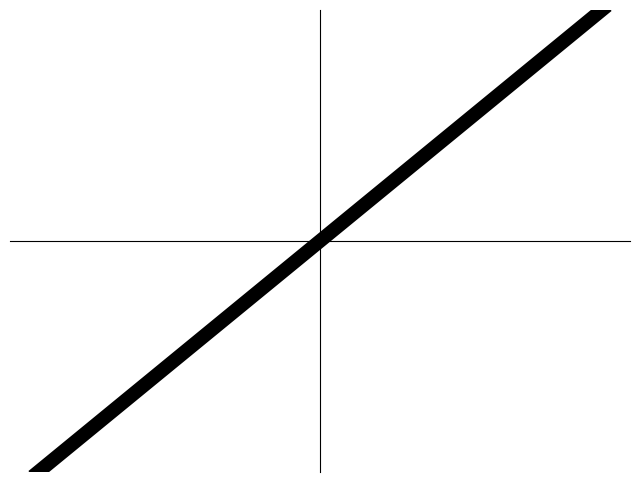

In [32]:
x_grid = np.linspace(-5, 5, 10000)


plt.figure(figsize = (8,6), dpi = 100)
plt.plot(x_grid, x_grid, c="#000000", linewidth = 10)
plt.ylim((-5, 5))
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.savefig("Linear.svg")